# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [5]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")

In [6]:
#Looking for missing values
print(penguins_df.isna().any())

#Checking dtypes
print(penguins_df.dtypes)

#Dropping columns with missing values
penguins_df = penguins_df.dropna()

culmen_length_mm     True
culmen_depth_mm      True
flipper_length_mm    True
body_mass_g          True
sex                  True
dtype: bool
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [7]:
penguins_df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [8]:
#Creating list to store lower and upper thresholds of each column
thresholds = []

#List with columns to iterate
cols_with_outliers = penguins_df.drop("sex", axis=1)

#Building loop to iterate through columns to get quantiles and IQR for each column
for col in cols_with_outliers.columns:
    
    #Calculating q1 for the columns
    q1 = penguins_df[col].quantile(0.25)
    q3 = penguins_df[col].quantile(0.75)

    #Calculating IQR
    IQR= q3-q1
    
    #Calculating thresholds
    lower_threshold = q1 - (1.5 * IQR)
    upper_threshold = q3 + (1.5* IQR)
    
    #Appending thresholds
    thresholds.append([lower_threshold, upper_threshold])

#Checking thresholds to see validate if values make sense
print(thresholds)

[[25.925000000000004, 62.12499999999999], [10.95, 23.349999999999998], [155.5, 247.5], [1693.75, 6643.75]]


In [9]:
#Building penguins_clean df
penguins_clean = penguins_df.copy()

#Building loop to iterate columns and implement changes
for i, out_col in enumerate(cols_with_outliers):
    
    # Accessing thresholds for the current column
    lt, ut = thresholds[i]
    
    #Accessing thresholds inside list
    lt = thresholds[i][0]
    ut = thresholds[i][1]
    
    #Creating new penguins_clean dataframe without outliers
    penguins_clean = penguins_clean[(penguins_clean[out_col] > lt) & (penguins_clean[out_col] < ut)]

print(penguins_clean)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0                39.1             18.7              181.0       3750.0    MALE
1                39.5             17.4              186.0       3800.0  FEMALE
2                40.3             18.0              195.0       3250.0  FEMALE
4                36.7             19.3              193.0       3450.0  FEMALE
5                39.3             20.6              190.0       3650.0    MALE
..                ...              ...                ...          ...     ...
338              47.2             13.7              214.0       4925.0  FEMALE
340              46.8             14.3              215.0       4850.0  FEMALE
341              50.4             15.7              222.0       5750.0    MALE
342              45.2             14.8              212.0       5200.0  FEMALE
343              49.9             16.1              213.0       5400.0    MALE

[333 rows x 5 columns]


In [10]:
#Importing OneHotEncoder to categorise the sex variable
from sklearn.preprocessing import OneHotEncoder

#Initializing OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore")

#Creating new column with encoded values
n_col = encoder.fit_transform(penguins_clean[["sex"]])

#Replacing sex column in penguins_clean
penguins_clean["sex"] = n_col.toarray()

#Viewing new column to ensure all is ok
print(penguins_clean["sex"])

#Since grader uses pd.getdummies() needed to do this to see if the values matched : (
penguins_wd = pd.get_dummies(penguins_clean, columns=['sex'], drop_first=True) 
assert (penguins_wd["sex_1.0"].values == penguins_clean["sex"].values).all()

0      0.0
1      0.0
2      0.0
4      0.0
5      0.0
      ... 
338    0.0
340    0.0
341    0.0
342    0.0
343    0.0
Name: sex, Length: 333, dtype: float64


In [11]:
#Importing standard scaler to scale data for model
from sklearn.preprocessing import StandardScaler

#Initializing scaler
scaler = StandardScaler()

#Building penguins_preprocessed df
penguins_preprocessed = penguins_clean.copy()

#Building loop to run scaler in all dataframe columns
for col_np in penguins_clean.columns:
    #Removing sex column from scaling, as it is categorical
    if col_np!="sex":
        #Building penguins_preprocessed with all columns scaled 
        penguins_preprocessed[col_np] = scaler.fit_transform(penguins_clean[[col_np]])

print(penguins_preprocessed)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0           -0.905520         0.793126          -1.428125    -0.569709  0.0
1           -0.831938         0.128503          -1.071522    -0.507579  0.0
2           -0.684775         0.435252          -0.429637    -1.191006  0.0
4           -1.347011         1.099875          -0.572278    -0.942487  0.0
5           -0.868729         1.764498          -0.786240    -0.693968  0.0
..                ...              ...                ...          ...  ...
338          0.584511        -1.763116           0.925454     0.890339  0.0
340          0.510929        -1.456367           0.996775     0.797145  0.0
341          1.173166        -0.740619           1.496019     1.915480  0.0
342          0.216602        -1.200743           0.782813     1.232053  0.0
343          1.081188        -0.536120           0.854134     1.480572  0.0

[333 rows x 5 columns]


In [12]:
#Importing PCA
from sklearn.decomposition import PCA

#Initializing PCA
pca = PCA()

#Building penguins_PCA df
penguins_PCA = penguins_preprocessed.copy()

#Building loop to fit PCA in all dataframe columns except "sex"
for col_npca in penguins_preprocessed.columns:
    #Removing sex column from scaling, as it is categorical
    if col_npca!="sex":
        #Building penguins_preprocessed with all columns scaled 
        pca.fit(penguins_preprocessed[[col_npca]])

#Defining n_components
n_components = sum(pca.explained_variance_ratio_ > 0.1)

#Changing pca to account for n_components 
pca = PCA(n_components=n_components)

#Building loop to run scaler in all dataframe columns
for col_npca in penguins_PCA.columns:
    #Removing sex column from scaling, as it is categorical
    if col_npca!="sex":
        #Building penguins_preprocessed with all columns scaled 
        penguins_PCA[col_npca] = pca.fit_transform(penguins_preprocessed[[col_npca]])

print(penguins_PCA)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0           -0.905520         0.793126          -1.428125    -0.569709  0.0
1           -0.831938         0.128503          -1.071522    -0.507579  0.0
2           -0.684775         0.435252          -0.429637    -1.191006  0.0
4           -1.347011         1.099875          -0.572278    -0.942487  0.0
5           -0.868729         1.764498          -0.786240    -0.693968  0.0
..                ...              ...                ...          ...  ...
338          0.584511        -1.763116           0.925454     0.890339  0.0
340          0.510929        -1.456367           0.996775     0.797145  0.0
341          1.173166        -0.740619           1.496019     1.915480  0.0
342          0.216602        -1.200743           0.782813     1.232053  0.0
343          1.081188        -0.536120           0.854134     1.480572  0.0

[333 rows x 5 columns]


In [13]:
#Importing kMeansClustering
from sklearn.cluster import KMeans

#Creating empty list for inertia
inertia = []

#Performing elbow analysis trying clusters from 1-10
for k in range(1, 10):
    #Initializing and fitting the kmeans 
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    
    #Appending inertia to list
    inertia.append(kmeans.inertia_)

#View list of inertia values
print(inertia)

/Users/tiagoleitaodematos/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tiagoleitaodematos/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1332.9969969969968, 552.3350425462513, 369.57792855764615, 292.63611504549715, 228.93830623235556, 200.42555790372117, 183.08717103347357, 166.3868139586649, 155.56060690606094]


/Users/tiagoleitaodematos/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tiagoleitaodematos/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tiagoleitaodematos/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tiagoleitaodematos/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

In [14]:
#Setting n_clusters to minimize inertia
n_clusters = inertia.index(min(inertia))+1

#View n_clusters
print(n_clusters)

9


/Users/tiagoleitaodematos/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


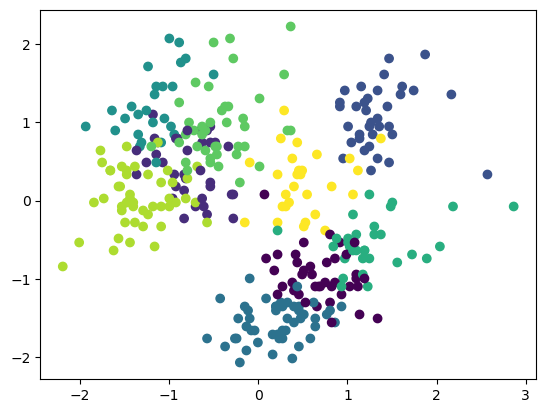

In [15]:
#Initialing new kmeans with n_clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

#Fitting the model on the dataframe
kmeans.fit(penguins_PCA)

plt.scatter(x=penguins_PCA["culmen_length_mm"], y=penguins_PCA["culmen_depth_mm"], c=kmeans.labels_)
plt.show()

In [16]:
#Adding cluster labels column to penguins_clean dataframe
penguins_clean["cluster_labels"] = kmeans.labels_

#Grouping penguins_clean dataframe by clusters
stat_penguins = penguins_clean.groupby("cluster_labels").mean()

#Viewing penguins_stats
print(stat_penguins)

                culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
cluster_labels                                                         
0                      47.755000        15.260000         217.300000   
1                      39.783333        17.986111         183.638889   
2                      51.348571        19.228571         200.028571   
3                      45.175510        14.104082         211.877551   
4                      37.600000        19.523077         191.346154   
5                      51.009677        16.090323         225.612903   
6                      41.756098        19.043902         195.682927   
7                      36.727660        17.202128         189.042553   
8                      46.757143        17.600000         192.071429   

                body_mass_g    sex  
cluster_labels                      
0               5218.750000  0.025  
1               3569.444444  0.000  
2               3944.285714  0.000  
3               4621.9